In [1]:
import numpy as np
import pandas as pd
import torch

from torch.utils.data import Dataset, DataLoader, TensorDataset

In [2]:
folder = 'dataset/'
# Sem Vazamento
df1 = pd.read_csv(folder + 'data_1.csv', header=None)#.iloc[:, 0:36]
df2 = pd.read_csv(folder + 'data_2.csv', header=None)#.iloc[:, 0:36]
df3 = pd.read_csv(folder + 'data_3.csv', header=None)#.iloc[:, 0:36]
df4 = pd.read_csv(folder + 'data_4.csv', header=None)#.iloc[:, 0:36]
df5 = pd.read_csv(folder + 'data_5.csv', header=None)#.iloc[:, 0:36]
df6 = pd.read_csv(folder + 'data_6.csv', header=None)#.iloc[:, 0:36]
df7 = pd.read_csv(folder + 'data_7.csv', header=None)#.iloc[:, 0:36]
df8 = pd.read_csv(folder + 'data_8.csv', header=None)#.iloc[:, 0:36]
df9 = pd.read_csv(folder + 'data_9.csv', header=None)#.iloc[:, 0:36]

'''
# Vazamento dia inteiro nó 12
df10 = pd.read_csv('data_10.csv', header=None)#.iloc[:, 0:36]
df11 = pd.read_csv('data_11.csv', header=None)#.iloc[:, 0:36]
df12 = pd.read_csv('data_12.csv', header=None)#.iloc[:, 0:36]

# Vazamento meio dia inteiro nó 12
df13 = pd.read_csv('data_13.csv', header=None)#.iloc[:, 0:36]
df14 = pd.read_csv('data_14.csv', header=None)#.iloc[:, 0:36]
df15 = pd.read_csv('data_15.csv', header=None)#.iloc[:, 0:36]

# Vazamento dia inteiro nó 14
df16 = pd.read_csv('data_16.csv', header=None)#.iloc[:, 0:36]
df17 = pd.read_csv('data_17.csv', header=None)#.iloc[:, 0:36]
df18 = pd.read_csv('data_18.csv', header=None)#.iloc[:, 0:36]

# Vazamento meio dia inteiro nó 114
df19 = pd.read_csv('data_19.csv', header=None)#.iloc[:, 0:36]
df20 = pd.read_csv('data_20.csv', header=None)#.iloc[:, 0:36]
df21 = pd.read_csv('data_21.csv', header=None)#.iloc[:, 0:36]

'''
#Msj = pd.read_csv('Mat-adj-sem-junc.csv')
Mcj = pd.read_csv('Mat-adj-com-junc.csv')

Header_tm = ['T(s)'] # 0
Header_vz = ['VZ2','VZ3','VZ4','VZ5','VZ6','VZ7','VZ8','VZ9'] # 1 - 9
Header_v = ['V2','V3','V4','V5','V6','V7','V8','V9'] # 10 - 17
Header_p = ['P2','P3','P4','P5','P6','P7','P8','P9'] # 18 - 25
Header_alpha1 = ['ap1_2','ap1_3','ap1_4','ap1_5','ap1_6','ap1_7','ap1_8','ap1_9'] # 26 - 33
Header_alpha2 = ['ap2_2','ap2_3','ap2_4','ap2_5','ap2_6','ap2_7','ap2_8','ap2_9'] # 34 - 41
Header_x = ['x2', 'x3', 'x4', 'x5','x6', 'x7', 'x8', 'x9'] # 42 - 49
Header_y = ['y2', 'y3', 'y4', 'y5','y6', 'y7', 'y8', 'y9'] # 50 - 57
Header_z = ['z2', 'z3', 'z4', 'z5','z6', 'z7', 'z8', 'z9'] # 58 - 65
Header_Lb = ['Lb_12', 'Lb_14'] # 66 - 67
Header_1214 = ['x12', 'x14', 'y12', 'y14', 'z12', 'z14'] # 68 - 73
Header_Week = ['week_day'] # 74

Header = Header_tm + Header_vz + Header_v + Header_p + Header_alpha1 + Header_alpha2 + Header_x + Header_y + Header_z + Header_Lb + Header_1214 + Header_Week


#Header = ['T(s)',,'P2','P7','P9','P12','P14' ,'V2',
 #         'V7','V9','V12','V14','X2', 'X7', 'X9', 'X12', 'X14', 'Y2', 'Y7', 'Y9',
  #        'Y12', 'Y14', 'Z2', 'Z7', 'Z9', 'Z12', 'Z14','LB3', 'LB5', 'LB9', 'LB11', 'LB13' ]



In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size


In [5]:
'''
plt.title('Time x Pressure')
plt.ylabel('Pressure')
plt.xlabel('Time(s)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
#plt.plot(DataN[0])
plt.plot(df7['P2'])
'''

"\nplt.title('Time x Pressure')\nplt.ylabel('Pressure')\nplt.xlabel('Time(s)')\nplt.grid(True)\nplt.autoscale(axis='x',tight=True)\n#plt.plot(DataN[0])\nplt.plot(df7['P2'])\n"

In [6]:

# Nomalização dos dados - "opcional"

from sklearn import preprocessing

def Norm(Data):
    x = Data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    Data = pd.DataFrame(x_scaled)
    
    return Data


In [7]:
'''
df_time = df1[0]

df1 = Norm(df1)
df2 = Norm(df2)
df3 = Norm(df3)
df4 = Norm(df4)
df5 = Norm(df5)
df6 = Norm(df6)
df7 = Norm(df7)
df8 = Norm(df8)
df9 = Norm(df9)
'''
df1.columns = df2.columns = df3.columns = df4.columns = df5.columns \
= df6.columns = df7.columns = df8.columns = df9.columns = Header
'''
df1.columns = df2.columns = df3.columns = df4.columns = df5.columns \
= df6.columns = df7.columns = df8.columns = df9.columns = df10.columns = df11.columns = df12.columns \
= df13.columns = df14.columns = df15.columns = df16.columns = df17.columns = df18.columns = df19.columns = df20.columns = df21.columns= Header
'''
#df1['T(s)'] = df2['T(s)'] = df3['T(s)'] = df4['T(s)'] = df5['T(s)'] = df6['T(s)'] = df7['T(s)'] = df8['T(s)'] = df9['T(s)'] = df_time

'\ndf1.columns = df2.columns = df3.columns = df4.columns = df5.columns = df6.columns = df7.columns = df8.columns = df9.columns = df10.columns = df11.columns = df12.columns = df13.columns = df14.columns = df15.columns = df16.columns = df17.columns = df18.columns = df19.columns = df20.columns = df21.columns= Header\n'

In [8]:
'''
df1['week_day'] = '2021-01-01'
df2['week_day'] = '2021-01-02'
df3['week_day'] = '2021-01-03'
df4['week_day'] = '2021-01-04'
df5['week_day'] = '2021-01-05'
df6['week_day'] = '2021-01-06'
df7['week_day'] = '2021-01-07'
df8['week_day'] = '2021-01-08'
df9['week_day'] = '2021-01-09'
'''

"\ndf1['week_day'] = '2021-01-01'\ndf2['week_day'] = '2021-01-02'\ndf3['week_day'] = '2021-01-03'\ndf4['week_day'] = '2021-01-04'\ndf5['week_day'] = '2021-01-05'\ndf6['week_day'] = '2021-01-06'\ndf7['week_day'] = '2021-01-07'\ndf8['week_day'] = '2021-01-08'\ndf9['week_day'] = '2021-01-09'\n"

In [9]:
df41 = df4[50:]
df71 = df7[50:]
df51 = df5[50:]
df81 = df8[50:]
df61 = df6[50:]
df91 = df9[50:]

In [10]:
Frames = [ df41, df71, df51, df81, df61, df91]
#Frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21]
#Frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
Data = pd.concat(Frames)
Data_T = Data['T(s)']

In [11]:
Data = Norm(Data)
Data.columns = Header

In [12]:
Data.columns

Index(['T(s)', 'VZ2', 'VZ3', 'VZ4', 'VZ5', 'VZ6', 'VZ7', 'VZ8', 'VZ9', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9', 'ap1_2', 'ap1_3', 'ap1_4', 'ap1_5', 'ap1_6', 'ap1_7',
       'ap1_8', 'ap1_9', 'ap2_2', 'ap2_3', 'ap2_4', 'ap2_5', 'ap2_6', 'ap2_7',
       'ap2_8', 'ap2_9', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'y2',
       'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'z2', 'z3', 'z4', 'z5', 'z6',
       'z7', 'z8', 'z9', 'Lb_12', 'Lb_14', 'x12', 'x14', 'y12', 'y14', 'z12',
       'z14', 'week_day'],
      dtype='object')

In [13]:
Data['T(s)'] = pd.DataFrame(Data_T).values

In [14]:
Data.head()

,T(s),VZ2,VZ3,VZ4,VZ5,VZ6,VZ7,VZ8,VZ9,V2,...,z9,Lb_12,Lb_14,x12,x14,y12,y14,z12,z14,week_day
0,30000,0.540957,0.361609,0.611111,0.655172,0.586207,0.540957,0.435714,0.368827,0.673288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30600,0.540957,0.361609,0.611111,0.655172,0.586207,0.540957,0.435714,0.368827,0.673288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31200,0.540957,0.361609,0.611111,0.655172,0.586207,0.540957,0.435714,0.368827,0.673288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31800,0.540957,0.361609,0.611111,0.655172,0.586207,0.540957,0.435714,0.368827,0.673288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32400,0.482373,0.423379,0.666667,0.586207,0.379310,0.482373,0.328571,0.414633,0.733056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
Data.loc[Data['Lb_12'] == 1,  'label'] = 2 
Data.loc[Data['Lb_14'] == 1,  'label'] = 5   
Data.loc[(Data['Lb_14'] == 0) & (Data['Lb_12'] == 0), 'label'] = 0

#df1.loc[df1['Lb_12'] == 1,  'label'] = 12 
#df1.loc[df1['Lb_14'] == 1,  'label'] = 14 
#df1.loc[(df1['Lb_14'] == 0) & (df1['Lb_12'] == 0), 'label'] = 0

In [16]:
Data['label'].unique()

array([0., 2., 5.])

In [17]:
'''
# Adicionar uma coluna com o label dos dados, seguindo a sequencia da matriz de adjacências.
df1.columns = df2.columns = df3.columns = Header
df1['Label'] = 0
df2['Label'] = 7
df3['Label'] = 14

Frames = [df1, df2, df3]
Data = pd.concat(Frames)

Data.head(2)

'''

"\n# Adicionar uma coluna com o label dos dados, seguindo a sequencia da matriz de adjacências.\ndf1.columns = df2.columns = df3.columns = Header\ndf1['Label'] = 0\ndf2['Label'] = 7\ndf3['Label'] = 14\n\nFrames = [df1, df2, df3]\nData = pd.concat(Frames)\n\nData.head(2)\n\n"

In [18]:

# Shuffle 'Opcional'
#Data = Data.sample(frac = 1)
#Data.head(2)

In [19]:





# Juntar os dados de acordo com as colunas
'''
Data['N0'] = Data[['P2', 'ap1_2', 'ap2_2']].values.tolist()
Data['N1'] = Data[['P7', 'ap1_7', 'ap2_7']].values.tolist()
Data['N2'] = Data[['P8', 'ap1_8', 'ap2_8']].values.tolist()
Data['N3'] = Data[['P9', 'ap1_9', 'ap2_9']].values.tolist()
Data['N4'] = Data[['P3', 'ap1_3', 'ap2_3']].values.tolist()
Data['N5'] = Data[['P4', 'ap1_4', 'ap2_4']].values.tolist()
Data['N6'] = Data[['P5', 'ap1_5', 'ap2_5']].values.tolist()
Data['N7'] = Data[['P6', 'ap1_6', 'ap2_6']].values.tolist()
'''
Data['N0'] = Data[['P2']].values.tolist()
Data['N1'] = Data[['P7']].values.tolist()
Data['N2'] = Data[['P8']].values.tolist()
Data['N3'] = Data[['P9']].values.tolist()
Data['N4'] = Data[['P3']].values.tolist()
Data['N5'] = Data[['P4']].values.tolist()
Data['N6'] = Data[['P5']].values.tolist()
Data['N7'] = Data[['P6']].values.tolist()

# Equivalencia:
# N2 = N0
# N7 = N1
# N8 = N2
# N9 = N3
# N3 = N4
# N4 = N5
# N5 = N6
# N6 = N7

# criando um novo dataset e separando em Data e Label.
NHeader = ['N0', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7']
DataN = Data[NHeader]

Label = Data['label']
Label = pd.DataFrame(Label)


In [20]:
#Header_p = ['P2','P7','P8','P9','P3','P4','P5','P6'] 
#HeaderN = ['T(s)' , 'week_day']
#Headerdata = Header_p + HeaderN

#DataN = Data[Header_p]

#Label = Data['label']
#Label = pd.DataFrame(Label)


In [21]:
DataN.head(2)

,N0,N1,N2,N3,N4,N5,N6,N7
0,[0.5409566007725517],[0.5409566007725517],[0.4357142857142857],[0.36882697947214077],[0.36160919540229886],[0.6111111111111112],[0.6551724137931035],[0.5862068965517242]
1,[0.5409566007725517],[0.5409566007725517],[0.4357142857142857],[0.36882697947214077],[0.36160919540229886],[0.6111111111111112],[0.6551724137931035],[0.5862068965517242]


In [22]:

DataN = DataN.to_numpy()
Label = Label.to_numpy()

from sklearn.model_selection import train_test_split

# Separar os dataset em treino, teste e validação nas proporções (70%, 15%, 15%)
train_ratio = 0.75
val_ratio = test_ratio = 0.25

x_train, x_test, y_train, y_test = train_test_split(DataN, Label, test_size = 1 - train_ratio, shuffle=True)
#testSize = (test_ratio/(test_ratio + val_ratio))
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = testSize, shuffle=False)


In [23]:
def Tensor_Dataset1(x, y):

    # z = Como o algoritmo trabalha com multiplas topologias e o nosso tem apenas uma, 
    # criei um tensor que linka todos os dados a nossa matriz adjacência


    e = []
    z = torch.tensor(1, dtype=torch.int32) 
    A = []
    for a in range(np.shape(x)[0]):
        d = []
        for b in range(np.shape(x)[1]):
            c = np.array(x[a][b])        
            d.append(c)
            #print('d',d)
        e.append(d)
        A.append(z)
    
    y_ = []
    for i in y:
        #y_.append(y[i].item())
        y_.append(i.item())
        
    e1 = torch.Tensor(e).type(torch.double)   # X
    f1 = torch.LongTensor(y_)                 # Label
    A1 = torch.LongTensor(A)                  # Localização matriz Adjacência
    
    
    my_dataset = TensorDataset(e1, f1, A1)

    # my_dataset[0] - [X, Y, A]

    return my_dataset

In [24]:
TrainDataset = Tensor_Dataset1(x_train, y_train) 
TestDataset = Tensor_Dataset1(x_test, y_test)
#UnrelatedDataset = Tensor_Dataset1(x_val, y_val) # validação

<ipython-input-23-99f79f8b03d9>:25: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  f1 = torch.LongTensor(y_)                 # Label


In [25]:
adc = pd.read_csv('Mat-adj-com-junc.csv', header=None)

#ads = Msj

In [26]:
dist = np.array([[0,10,13,13,19,19,19,19], [10,0,3,3,9,9,9,9], [13,3,0,6,12,12,6,6],[13,3,6,0,6,6,12,12],[19,9,12,6,0,12,18,18],[19,9,12,6,12,0,18,18],[19,19,6,12,18,18,0,12],[19,9,6,12,18,18,12,0]])

In [27]:
dist1 = torch.from_numpy(dist)

In [28]:
dist_c_j = torch.from_numpy(np.array(adc))
#dist_s_j = torch.from_numpy(np.array(ads))

In [29]:
# converte a matriz de distância para matriz de Adjacêcnias (unitárias)

def Dist_to_Adj(Adj):
    for i in range(len(Adj)):
        for j in range(len(Adj)):
            if Adj[i][j] >= 1:
                Adj[i][j] = 1

    Adj1 = np.array(Adj)
    adj_matrices = torch.from_numpy(Adj1)

    return adj_matrices

In [30]:
#ads = ads.to_numpy()
adc = adc.to_numpy()
#Adj_s_j = Dist_to_Adj(ads)
Adj_c_j = Dist_to_Adj(adc)

In [31]:
#Adj_s_j_tensor = torch.stack((Adj_s_j, Adj_s_j)).type(torch.double)
Adj_c_j_tensor = torch.stack((Adj_c_j, Adj_c_j)).type(torch.double)

dist_c_j_tensor = torch.stack((dist1, dist1)).type(torch.double)
#dist_s_j_tensor = torch.stack((dist_s_j, dist_s_j)).type(torch.double)

In [32]:
torch.save(TrainDataset,folder + 'train_dataset_d11_nz.pt')
torch.save(TestDataset,folder + 'test_dataset_d11_nz.pt')
#torch.save(UnrelatedDataset,'unrelated_dataset_rev2.pt')

torch.save(dist_c_j_tensor,folder +  'dist_matrices_d11_nz.pt')
torch.save(Adj_c_j_tensor,folder +  'adj_matrices_d11_nz.pt')

#torch.save(dist_s_j_tensor, 'dist_matrices_0405.pt')
#torch.save(Adj_s_j_tensor, 'adj_matrices_0405.pt')

In [33]:
dist_c_j_tensor[0]

tensor([[ 0., 10., 13., 13., 19., 19., 19., 19.],
        [10.,  0.,  3.,  3.,  9.,  9.,  9.,  9.],
        [13.,  3.,  0.,  6., 12., 12.,  6.,  6.],
        [13.,  3.,  6.,  0.,  6.,  6., 12., 12.],
        [19.,  9., 12.,  6.,  0., 12., 18., 18.],
        [19.,  9., 12.,  6., 12.,  0., 18., 18.],
        [19., 19.,  6., 12., 18., 18.,  0., 12.],
        [19.,  9.,  6., 12., 18., 18., 12.,  0.]], dtype=torch.float64)

In [34]:
TrainDataset[0][0]

tensor([[0.6964],
        [0.6964],
        [0.2992],
        [0.8232],
        [0.5345],
        [0.5824],
        [0.4138],
        [0.4377]], dtype=torch.float64)

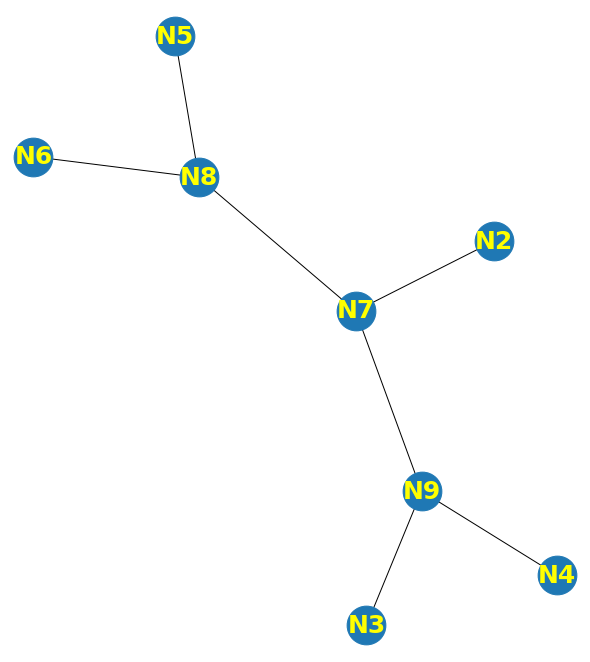

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

labeldict = {}
labeldict[0] = "shopkeeper"
labeldict[0] = "angry man with parrot"

#H = nx.relabel_nodes(G, mapping)
G = nx.Graph(adc)
#nx.draw(G, with_labels = True)

mapping={0:'N2',1:'N7',2:'N9',3:'N8',4:'N6',5:'N5', 6:'N4', 7:'N3'}
#adc, labels=labeldict, with_labels = True)
plt.figure(figsize=(8,9)) 
nx.draw(G,labels=mapping, with_labels = True,node_size=1500, font_size=25, font_color="yellow", font_weight="bold")

In [36]:
TrainDataset[:][1]

tensor([2, 5, 5, 2, 2, 5, 2, 5, 5, 5, 2, 2, 2, 2, 2, 2, 5, 2, 5, 2, 0, 2, 0, 0,
        5, 5, 5, 5, 5, 0, 2, 2, 5, 2, 0, 0, 5, 5, 2, 0, 2, 2, 2, 5, 0, 0, 2, 2,
        2, 5, 2, 0, 5, 2, 0, 2, 5, 2, 2, 0, 5, 5, 0, 5, 0, 5, 2, 0, 0, 2, 2, 5,
        2, 5, 0, 2, 5, 5, 5, 5, 5, 0, 2, 2, 5, 5, 2, 2, 2, 0, 2, 2, 0, 5, 0, 5,
        0, 5, 2, 2, 0, 5, 2, 0, 0, 2, 2, 2, 5, 2, 2, 2, 5, 2, 5, 2, 5, 0, 2, 5,
        5, 2, 5, 2, 5, 5, 5, 2, 5, 5, 2, 5, 5, 2, 5, 5, 5, 2, 5, 0, 0, 5, 2, 2,
        5, 0, 2, 0, 5, 5, 5, 5, 2, 5, 2, 2, 5, 5, 0, 5, 5, 0, 2, 2, 5, 0, 5, 0,
        5, 2, 2, 5, 2, 2, 5, 2, 5, 5, 5, 0, 5, 0, 5, 5, 5, 5, 0, 5, 5, 2, 5, 0,
        2, 2, 2, 0, 5, 5, 2, 5, 5, 2, 0, 5, 5, 0, 5, 2, 2, 2, 0, 5, 5, 5, 5, 2,
        2, 2, 5, 5, 0, 5, 0, 5, 5, 5, 2, 2, 5, 2, 2, 2, 5, 5, 0, 5, 5, 0, 5, 0,
        5, 0, 5, 5, 0, 2, 5, 5, 5, 5, 2, 5, 0, 2, 0, 2, 0, 2, 5, 0, 5, 2, 0, 5,
        5, 2, 0, 5, 5, 0, 2, 2, 2, 0, 0, 0, 5, 0, 2, 2, 2, 5, 5, 5, 5, 0, 0, 2,
        2, 2, 0, 2, 2, 5, 2, 5, 2, 2, 2,

In [37]:
df5['Lb_12'].value_counts()

1    73
0    72
Name: Lb_12, dtype: int64

In [38]:
xx = df1['P2']

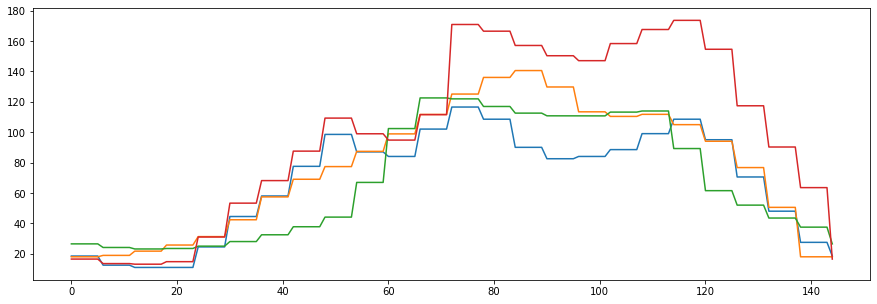

In [39]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.plot(df1['P2'])
plt.plot(df2['P2'])
plt.plot(df3['P2'])
plt.plot(df4['P2'])

In [40]:
df4[50:]

,T(s),VZ2,VZ3,VZ4,VZ5,VZ6,VZ7,VZ8,VZ9,V2,...,z9,Lb_12,Lb_14,x12,x14,y12,y14,z12,z14,week_day
50,30000,10.9230,1.7230,2.6,3.00,3.6,10.9230,6.60,4.3231,31.704,...,0,0,0,0,0,0.0,0,0,0,1
51,30600,10.9230,1.7230,2.6,3.00,3.6,10.9230,6.60,4.3231,31.704,...,0,0,0,0,0,0.0,0,0,0,1
52,31200,10.9230,1.7230,2.6,3.00,3.6,10.9230,6.60,4.3231,31.704,...,0,0,0,0,0,0.0,0,0,0,1
53,31800,10.9230,1.7230,2.6,3.00,3.6,10.9230,6.60,4.3231,31.704,...,0,0,0,0,0,0.0,0,0,0,1
54,32400,9.8917,1.9917,2.8,2.70,2.4,9.8917,5.10,4.7917,35.356,...,0,0,0,0,0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,84000,6.3500,0.3000,0.4,1.05,0.6,6.3500,1.65,4.7000,45.141,...,0,1,0,134,0,95.5,0,0,0,1
141,84600,6.3500,0.3000,0.4,1.05,0.6,6.3500,1.65,4.7000,45.141,...,0,1,0,134,0,95.5,0,0,0,1
142,85200,6.3500,0.3000,0.4,1.05,0.6,6.3500,1.65,4.7000,45.141,...,0,1,0,134,0,95.5,0,0,0,1
143,85800,6.3500,0.3000,0.4,1.05,0.6,6.3500,1.65,4.7000,45.141,...,0,1,0,134,0,95.5,0,0,0,1


In [41]:
TrainDataset[3][0][0]

tensor([0.7981], dtype=torch.float64)

In [42]:
len(x_train)

427

In [43]:
len(x_test)

143